In [ ]:
from smach_utils2 import *

In [ ]:
tfBuffer = tf2.Buffer()

listener = tf2.TransformListener(tfBuffer)
b_tf=tf2.TransformBroadcaster()
b_st=tf2.StaticTransformBroadcaster()


In [ ]:
def write_tf(pose, q, child_frame , parent_frame='map',time=0):
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
def read_tf(t):
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


In [ ]:
res=segmentation_server.call()

In [ ]:
res

In [ ]:
poses=np.asarray(res.poses.data)

poses=poses.reshape((int(len(poses)/3) ,3     )      )

In [ ]:
head.set_named_target('neutral')

In [ ]:
#t=write_tf(res.poses.data,(0,0,0,1),'Target',"head_rgbd_sensor_depth_frame",0)
t=write_tf(poses[0,:],(0,0,0,1),'Target_tmp',"head_rgbd_sensor_depth_frame",0) ## CHOOSE A TARGET 

b_tf.sendTransform(t)
rospy.sleep(0.2)
tt=tfBuffer.lookup_transform('map','Target_tmp',rospy.Time(0))
rospy.sleep(0.2)
tt
pose,quat= read_tf(tt)
t=write_tf(pose,(0,0,0,1),'Target')
b_st.sendTransform(t)


In [ ]:
head = moveit_commander.MoveGroupCommander('head')
#gripper =  moveit_commander.MoveGroupCommander('gripper')
#arm=moveit_commander.MoveGroupCommander('arm')

In [ ]:
#whole_body=moveit_commander.MoveGroupCommander('whole_body')

In [ ]:
clear_octo_client()
arm_grasp_from_above = [0.3, -2.0, 0.0, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:
head.set_named_target('neutral')
head.go()
clear_octo_client()


In [ ]:
#
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]#
wb_gp.pose.position.z= pose[2]+0.3   ##Pre Grasp from above


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
if plan[0]:
    succ=whole_body.go()
else:
    print('No plan')

In [ ]:
succ

In [ ]:
t=tfBuffer.lookup_transform('hand_palm_link', 'Target',rospy.Time())

In [ ]:
pose,_=read_tf(t)
pose

In [ ]:
goal_p=whole_body.get_current_pose()
goal_p.pose.position.x=0.1
goal_p.pose.position.y=pose[1]
goal_p.pose.position.z=pose[2]+0.2
#goal_p.pose.orientation.w=quat[0]
#goal_p.pose.orientation.x=quat[1]
#goal_p.pose.orientation.y=quat[2]
#goal_p.pose.orientation.z=quat[3]



In [ ]:
whole_body.set_pose_target(goal_p)

In [ ]:
whole_body.plan()

In [ ]:
goal_p=whole_body.get_current_pose()

In [ ]:
whole_body.set_pose_target(goal_p)
whole_body.plan()

In [ ]:
whole_body.go()

In [ ]:
res.poses.data

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time())

In [ ]:
pose,quat=read_tf(t)

In [ ]:
goal_pose= Pose()

In [ ]:
goal_pose.position.x=pose[0]
goal_pose.position.y=pose[1]
goal_pose.position.z=pose[2]

In [ ]:
pose,goal_pose

In [ ]:
whole_body.get_current_pose()

In [ ]:
wb=whole_body.get_current_joint_values()

In [ ]:
wb[4]=0.1

In [ ]:
whole_body.go(wb)

In [ ]:
pose=whole_body.get_current_pose()

In [ ]:
type(pose.pose.orientation)

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
gp=whole_body.get_current_pose()

In [ ]:

gp.pose.orientation
pose=gp
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])

In [ ]:
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tfBuffer.lookup_transform('hand_palm_link','New:static_Target',rospy.Time(0))

In [ ]:
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)

In [ ]:
wb_gp=whole_body.get_current_pose()

In [ ]:
eu=tf.transformations.euler_from_quaternion((wb_gp.pose.orientation.w,wb_gp.pose.orientation.x,wb_gp.pose.orientation.y,wb_gp.pose.orientation.z))
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)
rotated=tf.transformations.quaternion_multiply(quat,rot_quat)



In [ ]:
wb_gp.pose.position.x-=0.1
wb_gp.pose.position.y+=0.1
wb_gp.pose.position.z-=0.1


In [ ]:
wb_gp.pose.orientation.w=rotated[0]
wb_gp.pose.orientation.x=rotated[1]
wb_gp.pose.orientation.y=rotated[2]
wb_gp.pose.orientation.z=rotated[3]

In [ ]:
whole_body.set_pose_target(wb_gp)

In [ ]:

plan=whole_body.plan()
plan

In [ ]:
if plan[0]:
    whole_body.go()

In [ ]:
whole_body.go()

In [ ]:
arm_grasp_from_above = [0.19263830140116414, -2.2668981568652917, -0.007358947463759424, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:

t=tfBuffer.lookup_transform('New:static_Target','hand_palm_link',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat
np.save('above_quat.npy',quat)

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
plan

In [ ]:

whole_body.go()

In [ ]:
wb_v=whole_body.get_current_joint_values()


In [ ]:
gripper = GRIPPER()

In [ ]:
gripper.close()

In [ ]:
gripper =  moveit_commander.MoveGroupCommander('gripper')

In [ ]:

|
tf_man.pub_static_tf()

In [ ]:
head.set_joint_values([0.0, -0.77])


In [ ]:
print ('rdy')

In [ ]:
brazo.set_named_target('go')
head.set_joint_values([0.0, -0.77])
res=segmentation_server.call()
if len(res.poses.data)==0: print( 'failed')
else:

    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  





    tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(point_name='target', new_frame='map')
    rospy.sleep(0.3)
    pose, _ =tf_man.getTF('target')
    tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


    head.set_named_target('neutral')

In [ ]:
poses=np.asarray(res.poses.data)
poses=poses.reshape((int(len(poses)/3) ,3     )      )  





tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO

In [ ]:
tf_man.change_ref_frame_tf(point_name='target', new_frame='map')


In [ ]:
pose, _ =tf_man.getTF('target')
tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


In [ ]:
head.set_named_target('neutral')

In [ ]:
 clear_octo_client()
#############################10 * 2 *np.pi / 360 ####pi /2
arm_grasp_from_above = [0.2, -1.57, -0.13 , -1.57, 0.0, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)   

In [ ]:
clear_octo_client()
pose, quat=tf_man.getTF('Target')

wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2

whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()

In [ ]:
pos,rot=tf_man.getTF(target_frame=,ref)
pos

In [ ]:
from smach_utils2 import *

In [ ]:
from smach_utils2 import *


In [ ]:
wb_gp=whole_body.get_current_pose()            
wb_gp.header.frame_id="Target"
wb_gp.pose.position.x=0.02669
wb_gp.pose.position.y=0.045
wb_gp.pose.position.z= 0.033
wb_gp.pose.orientation.w=-0.990
wb_gp.pose.orientation.x= 0.0246
wb_gp.pose.orientation.y= -0.0085
wb_gp.pose.orientation.z= 0.1345



In [ ]:
aaa

In [ ]:
from smach_ros import ActionServerWrapper

In [ ]:
res = speech_recog_server()

In [ ]:
res.data

#msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg

In [ ]:
if len(res.data.split(' '))>1:print(res.data.split(' ')[-1])    ### Number of words


In [ ]:
from ros_whisper_vosk.srv import SetGrammarVosk
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar(['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi'])  ##PRESET NAMES

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
msg

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg.data
if len(msg.data.split(' '))>1:print(msg.data.split(' ')[-1]) 

In [ ]:

res=get_keywords_speech(10)
res

In [ ]:
drinks=['coke','juice','beer', 'water', 'soda', 'wine']
names=['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi']
confirmation=['yes','no']
gram=drinks+names+confirmation

set_grammar(gram)  ##PRESET DRINKS


In [ ]:
res2 = get_keywords_speech(10)
if res2 in['yes','jack','juice']:print('chido',res2)
else: print ('chale',res2)

In [ ]:
set_grammar(['yes','no'])

In [ ]:
res2 in ['yes', 'no']

In [ ]:
res2='not'

In [ ]:
map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)

inflated_map= np.asarray(map_msg.data)

In [ ]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((img.info.width,img.info.height))

plt.imshow (img_map[750:1250,750:1250])

In [ ]:
seg

In [ ]:
class Find_object(smach.State):  # ADD KNONW LOCATION DOOR
    def __init__(self):
        smach.State.__init__(self, outcomes=['succ', 'failed', 'tries'])
        self.tries = 0

    def execute(self, userdata):

        rospy.loginfo('STATE : Segment and tfing object' )

        print(f'Try {self.tries} of 3 attempts')
        self.tries += 1
        if self.tries == 4:
            self.tries=0
            return 'tries'




        #if self.tries == 1: talk('Looking for object')
        brazo.set_named_target('go')
        if self.tries==1:head.set_joint_values([0.0, -0.77])
        
        rospy.sleep(0.8)
        res=segmentation_server.call()
        if len(res.poses.data)==0: return 'failed'
        else:
            print('object found')
            poses=np.asarray(res.poses.data)
            poses=poses.reshape((int(len(poses)/3) ,3     )      )  





            tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
            rospy.sleep(0.3)
            tf_man.change_ref_frame_tf(point_name='target', new_frame='map')
            rospy.sleep(0.3)
            pose, _ =tf_man.getTF('target')
            tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


            head.set_named_target('neutral')
            self.tries=0
            return 'succ'


In [1]:
from smach_utils2 import *


[ WARN] [1686158827.865177214]: Link hand_l_finger_vacuum_frame has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1686158827.867743909]: Link head_l_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1686158827.867767448]: Link head_r_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1686158827.868616885]: Group state 'neutral' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1686158827.868638527]: Group state 'go' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1686158828.356764999]: Kinematics solver doesn't support #attempts any

In [3]:
brazo.set_named_target()
head.set_joint_values([0,-1])

[ WARN] [1686108662.504216018, 3453.534000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3453.585000 according to authority /pose_integrator
[ WARN] [1686108662.504293745, 3453.534000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3453.585000 according to authority /pose_integrator
[ WARN] [1686108662.504358118, 3453.534000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3453.585000 according to authority /pose_integrator
[ WARN] [1686108662.504414700, 3453.534000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3453.585000 according to authority /pose_integrator
[ WARN] [1686108662.504477158, 3453.534000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3453.585000 according to authority /pose_integrator
[ WARN] [1686108662.504530250, 3453.534000000]: TF_REPEATED_DATA ignoring data with redundant timestamp f

In [26]:
res=segmentation_server.call()

if len(res.poses.data)==0: print( 'failed')
else:
    print('object found')
    
    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  
    print (poses.shape)
    for i,pose in enumerate(poses):
        print ('occupied if not 0', contoured[round(contoured.shape[0]*0.5)+ round(pose[0]/pix_per_m),round(contoured.shape[0]*0.5)- round(pose[1]/pix_per_m)])
        point_name=f'object_{i}'
        print (point_name)
        if contoured[round(contoured.shape[0]*0.5)+ round(pose[0]/pix_per_m),round(contoured.shape[0]*0.5)- round(pose[1]/pix_per_m)] !=0:
            print ('reject point, most likely part of arena, occupied map')
        else:
            tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
            rospy.sleep(0.3)
            tf_man.change_ref_frame_tf(point_name=point_name, new_frame='map')
            rospy.sleep(0.3)

        

object found
(3, 3)
occupied if not 0 0
object_0
occupied if not 0 0
object_1
occupied if not 0 200
object_2
reject point, most likely part of arena, occupied map
shutdown request: [/smach] Reason: new node registered with same name


In [20]:


contoured[round(contoured.shape[0]*0.5)+ round(pose[0]/pix_per_m),round(contoured.shape[0]*0.5)- round(pose[1]/pix_per_m)]

0

In [19]:
#FREE SPACE . SO IT IS A PLAUSIBLE HYPOTHESIS OF A TRASH OBJECT

256

In [21]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

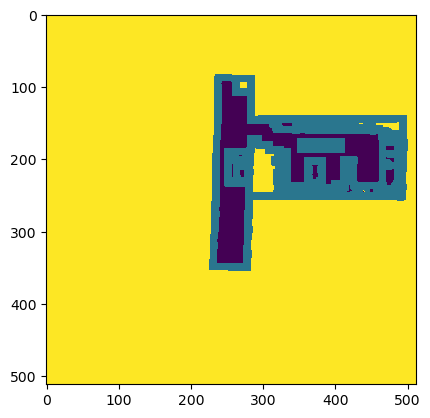

In [22]:

import matplotlib.pyplot as plt
plt.imshow(contoured)

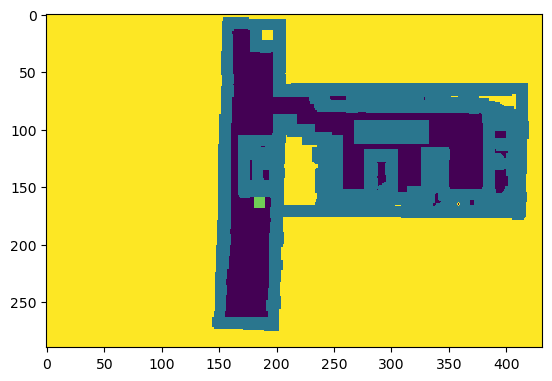

In [24]:
origin_map_img=[round(contoured.shape[0]*0.5) ,round(contoured.shape[1]*0.5)]
contoured[origin_map_img[0]+ round(pose[0]/pix_per_m),origin_map_img[1]- round(pose[1]/pix_per_m)]
contoured=draw_at(origin_map_img[0]+ round(pose[0]/pix_per_m),origin_map_img[1]- round(pose[1]/pix_per_m),contoured)
plt.imshow(contoured[80:370,80:])

In [ ]:

map_msg.info.origin.position

In [ ]:
robot=get_robot_px()
draw_at(1024+robot[1],1024+robot[0],contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')

In [ ]:
c=point_to_px(pose[0],pose[1])
robot=get_robot_px()
draw_at(1024+robot[1]+c[0],1024+robot[0]+c[1],contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')


In [ ]:
contoured[150,300]

In [ ]:
contoured[c[0]+1024,c[1]+1024]

In [ ]:

check_point_map(pose[0],pose[1])